In [1]:
import glob, os
import cv2
import numpy as np

In [2]:
def image_array(filename,size):
    array = cv2.imread(filename)
    array = cv2.resize(array, (size, size)) 
    return array

In [3]:
os.chdir('benign')

In [4]:
benign = []
for file in glob.glob("*.png"):
    array = image_array(file, 224)
    benign.append(array)

In [5]:
os.chdir('..')
os.chdir('benign_augmented')

In [6]:
for file in glob.glob("*.png"):
    array = image_array(file, 224)
    benign.append(array)

In [7]:
benign = np.asarray(benign)
benign.shape

(4960, 224, 224, 3)

In [8]:
os.chdir('..')
os.chdir('malignant')

In [9]:
malignant = []
for file in glob.glob("*.png"):
    array = image_array(file, 224)
    malignant.append(array)

In [10]:
malignant = np.asarray(malignant)
malignant.shape

(5429, 224, 224, 3)

In [11]:
data = np.concatenate((benign, malignant), axis = 0)
data.shape

(10389, 224, 224, 3)

In [12]:
label = []
for i in range(4960):
    label.append('benign')
    
for i in range(5429):
    label.append('malignant')

In [13]:
y = np.asarray(label)
y.shape

(10389,)

In [14]:
def one_hot_encoding(array):
    df = pd.DataFrame(array, index = None)
    data = pd.get_dummies(df)
    data = np.asarray(data)
    return data

In [15]:
import pandas as pd
label = one_hot_encoding(y)
label.shape

(10389, 2)

In [16]:
import sklearn
from sklearn import cross_validation

/home/itachi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(data, label , test_size = 0.3 , random_state = 100)

In [18]:
x_train.shape

(7272, 224, 224, 3)

In [19]:
x_test.shape

(3117, 224, 224, 3)

In [20]:
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np
from keras.applications.resnet50 import decode_predictions
from keras.activations import softmax
import types
import tempfile
import keras.models
from keras.layers import Activation, Dense

Using TensorFlow backend.


In [21]:
x_train = np.array(x_train , dtype = 'float')
x_test = np.array(x_test , dtype = 'float')

In [22]:
train = preprocess_input(x_train)
test = preprocess_input(x_test)

In [ ]:
train = features_train.reshape(features_train.shape[0] , -1)
test = features_test.reshape(features_test.shape[0] , -1)
training_epochs = 20
n_dim = train.shape[1]
print(n_dim)
n_class = 2

In [23]:
def resnet_model(img_rows, img_cols, channel=1, num_classes=None):

    model = ResNet50(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    model.layers[-1].outbound_nodes = []

          x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

          for layer in model.layers[:8]:

       layer.trainable = False

    model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [33]:
model = resnet_model(224, 224, channel = 3, num_classes = n_class)

In [35]:
history = model.fit(train, y_train, epochs=50,validation_data=(test,y_test))

Train on 7272 samples, validate on 3117 samples
Epoch 1/50
7272/7272 [==============================] - 2s 233us/step - loss: 0.2983 - acc: 0.8938 - val_loss: 0.1964 - val_acc: 0.9310
Epoch 2/50
7272/7272 [==============================] - 1s 134us/step - loss: 0.1685 - acc: 0.9403 - val_loss: 0.1514 - val_acc: 0.9474
Epoch 3/50
7272/7272 [==============================] - 1s 136us/step - loss: 0.1154 - acc: 0.9618 - val_loss: 0.1348 - val_acc: 0.9464
Epoch 4/50
7272/7272 [==============================] - 1s 134us/step - loss: 0.0949 - acc: 0.9674 - val_loss: 0.1249 - val_acc: 0.9551
Epoch 5/50
7272/7272 [==============================] - 1s 136us/step - loss: 0.0652 - acc: 0.9787 - val_loss: 0.1228 - val_acc: 0.9532
Epoch 6/50
7272/7272 [==============================] - 1s 133us/step - loss: 0.0486 - acc: 0.9840 - val_loss: 0.1028 - val_acc: 0.9621
Epoch 7/50
7272/7272 [==============================] - 1s 134us/step - loss: 0.0331 - acc: 0.9906 - val_loss: 0.1079 - val_acc: 0.9612


In [36]:
filename = 'breast_cancer.h5'

In [39]:
os.chdir('..')

In [40]:
model.save(filename)

In [41]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

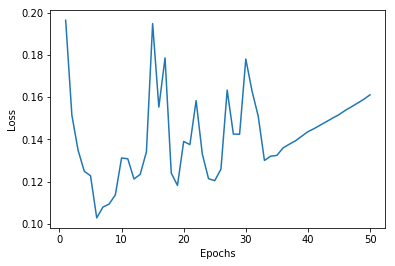

In [42]:
plt.plot(epochs, val_loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

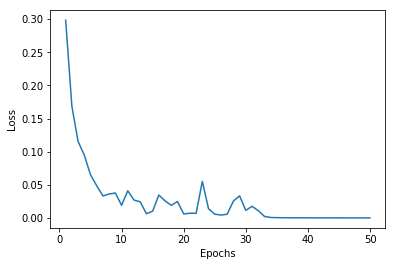

In [43]:
plt.plot(epochs, loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

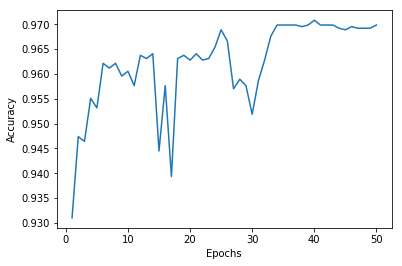

In [44]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, val_acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [58]:
arr = image_array('test2.png' , 224)
arr = np.array(arr , dtype = 'float')

In [59]:
y = preprocess_input(arr)
y = np.reshape(y, (1,224,224,3))

In [60]:
model1 = ResNet50(weights='imagenet', include_top = False)

In [61]:
x = model1.predict(y)

In [62]:
train = x.reshape(x.shape[0] , -1)

In [63]:
y = model.predict(train)

In [64]:
print(y)

[[4.970112e-05 9.999503e-01]]
